In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

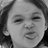

In [4]:
load_img('/content/fer2013/train/Angry/100.jpg')

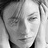

In [5]:

load_img('/content/fer2013/train/Sad/100.jpg')

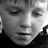

In [6]:
load_img('/content/fer2013/train/Fear/1000.jpg')

# Train and Test Set

In [7]:
training_generator=ImageDataGenerator(rescale=1./255,
                                      rotation_range=7,
                                      horizontal_flip=True,
                                      zoom_range=0.2)
train_dataset=training_generator.flow_from_directory('/content/fer2013/train',
                                                     target_size=(48,48),
                                                     batch_size=16,
                                                     class_mode='categorical',
                                                     shuffle=True)

Found 28709 images belonging to 7 classes.


In [8]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset=test_generator.flow_from_directory('/content/fer2013/validation',
                                                     target_size=(48,48),
                                                     batch_size=1,
                                                     class_mode='categorical',
                                                shuffle=False
                                                 )

Found 3589 images belonging to 7 classes.


In [9]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [10]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [11]:
np.unique(train_dataset.classes,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

<Axes: ylabel='count'>

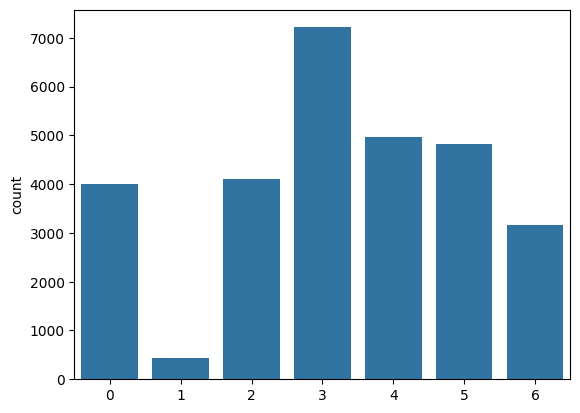

In [12]:
sns.countplot(x=train_dataset.classes)

# Building and Training the Neural Network

In [13]:
# Based on: https://github.com/rajeevratan84/DeepLearningCV/blob/master/18.2%20Building%20an%20Emotion%20Detector%20with%20LittleVGG.ipynb
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow
# BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
# Dropout: https://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf

num_detectors=32
num_classes=7
w,h=48,48
epochs=70

network=Sequential()

network.add(Conv2D(num_detectors,(3,3),activation='relu',padding='same',input_shape=(w,h,3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors,(3,3),activation='relu',padding='same',input_shape=(w,h,3)))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors,(3,3),activation='relu',padding='same',input_shape=(w,h,3)))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors,(3,3),activation='relu',padding='same',input_shape=(w,h,3)))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors,(3,3),activation='relu',padding='same',input_shape=(w,h,3)))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors,(3,3),activation='relu',padding='same',input_shape=(w,h,3)))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors,(3,3),activation='relu',padding='same',input_shape=(w,h,3)))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors,(3,3),activation='relu',padding='same',input_shape=(w,h,3)))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())


network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))
network.add(Dense(num_classes,activation='softmax'))




In [14]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                        

In [15]:
network.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
network.fit(train_dataset,epochs=epochs)

Epoch 1/70
 241/1795 [===>..........................] - ETA: 1:28 - loss: 0.6804 - accuracy: 0.7518

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-edd80316012c>", line 1, in <cell line: 1>
    network.fit(train_dataset,epochs=epochs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 832, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymo

TypeError: object of type 'NoneType' has no len()

In [18]:
model_json = network.to_json()
with open('network_emotions.json','w') as json_file:
  json_file.write(model_json)

In [19]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights_emotions.hdf5')

<ipython-input-19-9cb5bbf306ff>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, '/content/weights_emotions.hdf5')


In [21]:
with open('/content/network_emotions.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 48, 48, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias

In [23]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/weights_emotions.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                        

In [25]:
network_loaded.evaluate(test_dataset)

3589/3589 [==============================] - 18s 5ms/step - loss: 1.5352 - accuracy: 0.5687


[1.5352206230163574, 0.568682074546814]

In [26]:
predictions = network_loaded.predict(test_dataset)
predictions

3589/3589 [==============================] - 14s 4ms/step


array([[7.30994582e-01, 2.59435419e-02, 9.02201012e-02, ...,
        1.64863952e-02, 4.88523357e-02, 8.73062685e-02],
       [9.91331697e-01, 1.49653542e-05, 8.34937766e-03, ...,
        2.74355043e-05, 2.69311044e-04, 6.61786089e-06],
       [9.14348900e-01, 3.43886670e-04, 4.92239781e-02, ...,
        2.58928654e-03, 3.29283178e-02, 9.12864125e-05],
       ...,
       [6.44156802e-03, 1.18476935e-04, 6.84699863e-02, ...,
        1.68035238e-03, 9.07185581e-03, 9.14215386e-01],
       [1.02513665e-02, 4.31780936e-05, 2.23798543e-01, ...,
        3.04083414e-02, 2.95215659e-03, 7.30185509e-01],
       [5.47496323e-03, 2.60977744e-04, 6.12464873e-03, ...,
        3.46793421e-03, 2.54012085e-03, 9.63901937e-01]], dtype=float32)

In [27]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, ..., 6, 6, 6])

In [28]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.5686820841460016

In [30]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[302,   6,  50,  16,  59,  51,   7],
       [ 12,  33,   8,   1,   0,   1,   0],
       [ 73,   1, 240,  11,  67,  91,  45],
       [ 21,   0,  25, 734,  57,  22,  20],
       [ 98,  11, 100, 152, 123,  82,  60],
       [ 66,   1,  61,  25, 143, 289,   9],
       [ 10,   0,  58,  13,  14,   1, 320]])

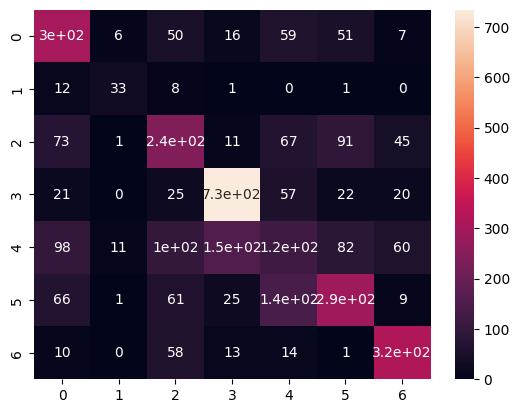

In [32]:
sns.heatmap(cm, annot=True);

In [33]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.52      0.62      0.56       491
           1       0.63      0.60      0.62        55
           2       0.44      0.45      0.45       528
           3       0.77      0.84      0.80       879
           4       0.27      0.20      0.23       626
           5       0.54      0.49      0.51       594
           6       0.69      0.77      0.73       416

    accuracy                           0.57      3589
   macro avg       0.55      0.57      0.56      3589
weighted avg       0.55      0.57      0.56      3589



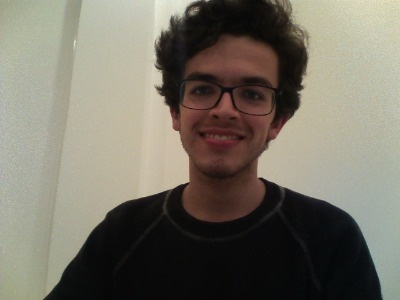

In [35]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/gabriel.png')
cv2_imshow(image)

In [36]:
image.shape

(300, 400, 3)

In [37]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision Masterclass/Cascades/haarcascade_frontalface_default.xml')

In [38]:
original_image = image.copy()
faces = face_detector.detectMultiScale(original_image)

In [39]:
faces

array([[162,  40, 128, 128]], dtype=int32)

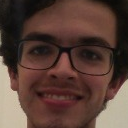

In [40]:
roi=image[40:40+128,162:162+128]
cv2_imshow(roi)

In [41]:
roi.shape

(128, 128, 3)

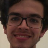

In [42]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [43]:
roi.shape

(48, 48, 3)

In [44]:
roi = roi / 255
roi

array([[[0.10980392, 0.1254902 , 0.14509804],
        [0.08627451, 0.10980392, 0.13333333],
        [0.12941176, 0.14509804, 0.16470588],
        ...,
        [0.04705882, 0.0627451 , 0.06666667],
        [0.0627451 , 0.08235294, 0.09803922],
        [0.0627451 , 0.09803922, 0.11764706]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.12156863, 0.14117647, 0.16078431],
        [0.1254902 , 0.14117647, 0.16078431],
        ...,
        [0.04313725, 0.0627451 , 0.0745098 ],
        [0.05098039, 0.0745098 , 0.09411765],
        [0.06666667, 0.09803922, 0.10980392]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.11764706, 0.13333333, 0.15294118],
        [0.10196078, 0.11764706, 0.1372549 ],
        ...,
        [0.04705882, 0.06666667, 0.07843137],
        [0.05490196, 0.07843137, 0.09803922],
        [0.07843137, 0.09803922, 0.10588235]],

       ...,

       [[0.63529412, 0.7254902 , 0.77254902],
        [0.65098039, 0.7372549 , 0.78431373],
        [0.65098039, 0

In [45]:
roi=np.expand_dims(roi,axis=0)

In [46]:
probs = network_loaded.predict(roi)
probs

1/1 [==============================] - 0s 365ms/step


array([[9.5720890e-05, 1.9353254e-06, 3.3281778e-04, 9.7285604e-01,
        2.5190661e-02, 1.3311435e-03, 1.9169362e-04]], dtype=float32)

In [47]:
result = np.argmax(probs)
result

3

In [48]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

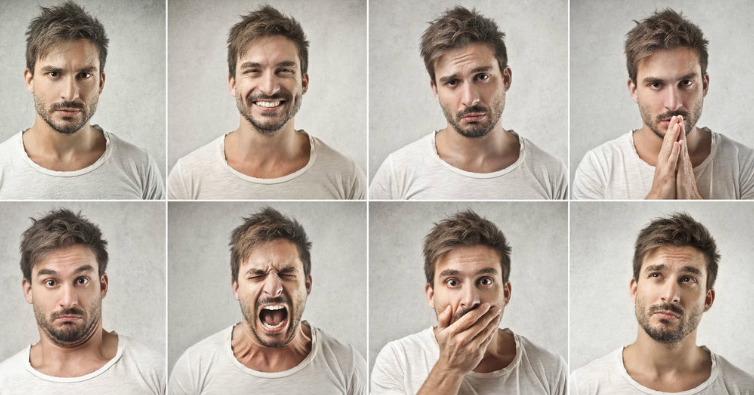

In [49]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/faces_emotions.png')
cv2_imshow(image)

In [50]:
faces = face_detector.detectMultiScale(image)
faces

array([[224,  35,  90,  90],
       [625,  49,  91,  91],
       [ 23,  41,  92,  92],
       [420,  43,  97,  97],
       [420, 242,  97,  97],
       [ 18, 243,  98,  98],
       [229, 242,  85,  85],
       [627, 241,  91,  91]], dtype=int32)

In [51]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [52]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 [==============================] - 0s 84ms/step


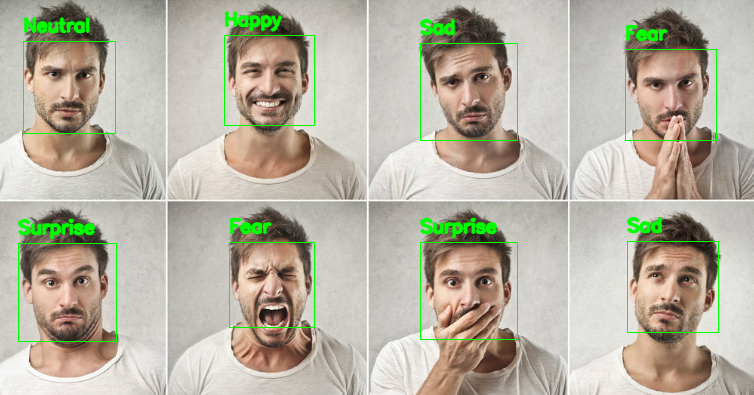

In [53]:
for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),1)
  roi=image[y:y+h,x:x+w]
  roi=cv2.resize(roi,(48,48))
  roi=roi/255
  roi=np.expand_dims(roi,axis=0)
  prediction = network_loaded.predict(roi)
  cv2.putText(image, emotions[np.argmax(prediction)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
cv2_imshow(image)

In [54]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Computer Vision Masterclass/Videos/emotion_test01.mp4')
connected, video = cap.read()
print(connected, video.shape)

True (360, 640, 3)


In [55]:
# fourcc.org
save_path = '/content/drive/MyDrive/Computer Vision Masterclass/Videos/emotion_test01_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [56]:
while (cv2.waitKey(1) < 0):
  connected, frame = cap.read()
  if not connected:
    break
  faces = face_detector.detectMultiScale(frame, scaleFactor=1.2, minNeighbors=5, minSize=(30,30))
  for (x, y, w, h) in faces:
     frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
     roi = frame[y:y + h, x:x + w]
     roi = cv2.resize(roi, (48, 48))
     roi = roi / 255
     roi = np.expand_dims(roi, axis = 0)
     prediction = network_loaded.predict(roi)

     if prediction is not None:
       result = np.argmax(prediction)
       cv2.putText(frame, emotions[result], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)

  cv2_imshow(frame)
  output_video.write(frame)

print('End')
output_video.release()
cv2.destroyAllWindows()